1. creat a function to request the Microsoft stock data through Alpha Vantage 

In [12]:
##import the libaray that needed
import  requests
import json

In [13]:
##creat the function that use to apply the data
def aqu_stock_data(symbol,api_key):
    ##endpoint API from alpha vantage
    url="https://www.alphavantage.co/query"
    params={
        ##requests data daily
        "function":"TIME_SERIES_DAILY",
        ##choosing company
        "symbol":symbol,
        ##size of the data
        "outputsize":"full",
        ##user API key
        "apikey":api_key
    }

    ##requests from URL
    response = requests.get(url,params)
    
    ##check if the data requried is successed
    if response.status_code == 200:
        return response.json()
    else:
        print("could not use API")

In [14]:
##input API key and choose the company which is Microsoft
##API key
#api_key='ON5BZ9UVB3BC2CCA'
api_key='TVQPPAU7D3SY0U1R'


##chose the company symbol
symbol  =   "MSFT"

##require data
stock_data = aqu_stock_data(symbol,api_key)

In [15]:
if stock_data:
    # save the response content to a file
    with open("Microsoft Original.json", "w") as f:
        json.dump(stock_data, f)

    # read the response content from the file
    with open("Microsoft Original.json", "r") as f:
        stock_data_loaded = json.load(f)
        assert stock_data == stock_data_loaded
        print(stock_data_loaded)
else:
    print("data requests fail")

{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


2. Filter out the data that is out of the range

In [16]:
## import libaray
from datetime import datetime
def Filter_Data(data, start_date, end_date):

    filtered_data={}
    ##setting the start time and end time and format then in year-month-day
    start_date=datetime.strptime(start_date,"%Y-%m-%d")
    end_date=datetime.strptime(end_date,"%Y-%m-%d")
    ## filtering the data
    for date,price in data["Time Series (Daily)"].items():
        current=datetime.strptime(date,"%Y-%m-%d")
        if start_date<=current<=end_date:
            filtered_data[date]=price
    
    return filtered_data


In [17]:
start_date="2019-04-01"
end_date="2023-03-31"
Data_for_use=Filter_Data(stock_data_loaded,start_date=start_date,end_date=end_date)
print(Data_for_use)

if Data_for_use:
    # save the response content to a file
    with open("Microsoft after filtered.json", "w") as f:
        json.dump(Data_for_use, f)

    # read the response content from the file
    with open("Microsoft after filtered.json", "r") as f:
        after_Filter = json.load(f)
        assert Data_for_use == after_Filter
        print(after_Filter)
else:
    print("data requests fail")

KeyError: 'Time Series (Daily)'

3. Plot the graph for the stock and 

In [18]:
##import the lib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [22]:
with open("Microsoft after filtered.json", "r") as f:
        after_Filter = json.load(f)
        print(after_Filter)
##prepare for the datas
## initialise the data that needed in future as empaty array
dates =[]
opens = []
closes = []
highs = []
lows = []
volumes = []

{'2023-03-31': {'1. open': '283.7300', '2. high': '289.2700', '3. low': '283.0000', '4. close': '288.3000', '5. volume': '32765976'}, '2023-03-30': {'1. open': '284.2300', '2. high': '284.4600', '3. low': '281.4800', '4. close': '284.0500', '5. volume': '25053410'}, '2023-03-29': {'1. open': '278.9600', '2. high': '281.1398', '3. low': '278.4100', '4. close': '280.5100', '5. volume': '25087032'}, '2023-03-28': {'1. open': '275.7900', '2. high': '276.1400', '3. low': '272.0451', '4. close': '275.2300', '5. volume': '21878647'}, '2023-03-27': {'1. open': '280.5000', '2. high': '281.4589', '3. low': '275.5200', '4. close': '276.3800', '5. volume': '26840212'}, '2023-03-24': {'1. open': '277.2400', '2. high': '280.6300', '3. low': '275.2800', '4. close': '280.5700', '5. volume': '28199962'}, '2023-03-23': {'1. open': '277.9400', '2. high': '281.0600', '3. low': '275.2000', '4. close': '277.6600', '5. volume': '36610879'}, '2023-03-22': {'1. open': '273.4000', '2. high': '281.0400', '3. low

In [23]:
## load data from the dictionary to array
for date_sting, data in after_Filter.items():
    date = datetime.strptime(date_sting, "%Y-%m-%d")
    dates.append(date)
    opens.append(float(data['1. open']))
    highs.append(float(data['2. high']))
    lows.append(float(data['3. low']))
    closes.append(float(data['4. close']))
    volumes.append(int(data['5. volume']))

In [24]:
def ploting_plot(dates,price,label:str, color, title:str):
    plt.plot(dates, price, label=label,color=color)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xticks(rotation=45)
    plt.savefig(f"{label}.png",format="png")


def plotting_bar(dates,price,label:str, color, title:str):
    plt.bar(dates, price, label=label,color=color)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xticks(rotation=45)
    plt.savefig(f"{label}.png",format="png")

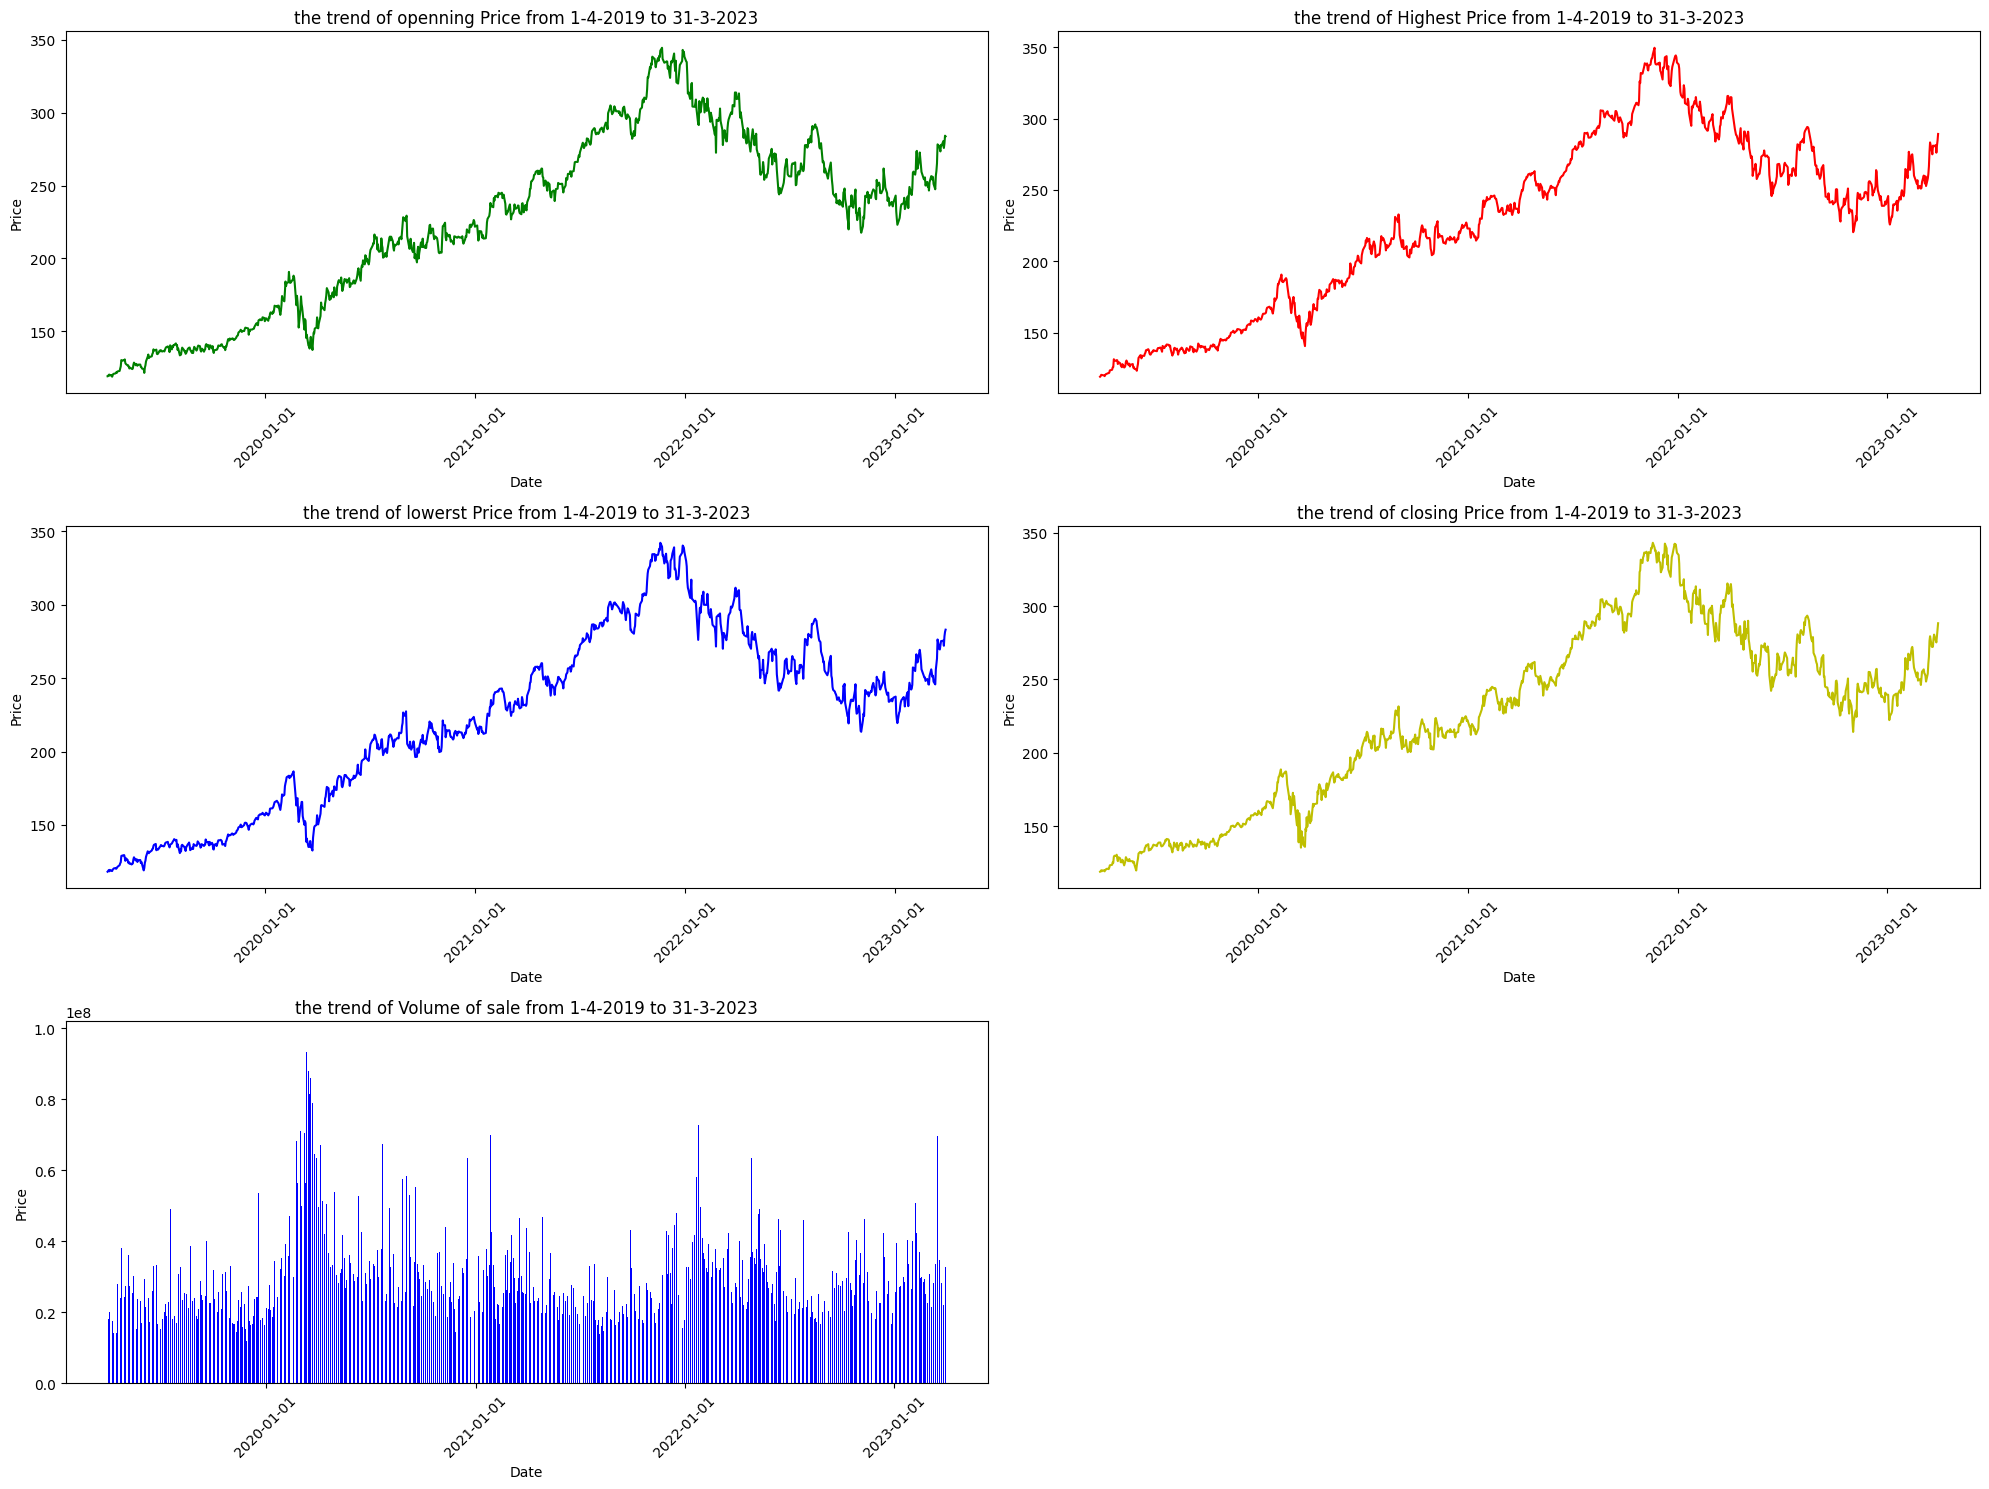

In [25]:
##opening ploting
plt.figure(figsize=(20, 15))
plt.subplot(321)
ploting_plot(dates,opens,label="Opening Price",color='g',title="the trend of openning Price from 1-4-2019 to 31-3-2023")
plt.subplot(322)
ploting_plot(dates,highs,label="Highest Price",color='r',title="the trend of Highest Price from 1-4-2019 to 31-3-2023")
plt.subplot(323)
ploting_plot(dates,lows,label="lowerst Price",color='b',title="the trend of lowerst Price from 1-4-2019 to 31-3-2023")
plt.subplot(324)
ploting_plot(dates,closes,label="closing Price",color='y',title="the trend of closing Price from 1-4-2019 to 31-3-2023")
plt.subplot(325)
plotting_bar(dates,volumes,label="Volume of sale",color='b',title="the trend of Volume of sale from 1-4-2019 to 31-3-2023")

plt.tight_layout()
plt.show()

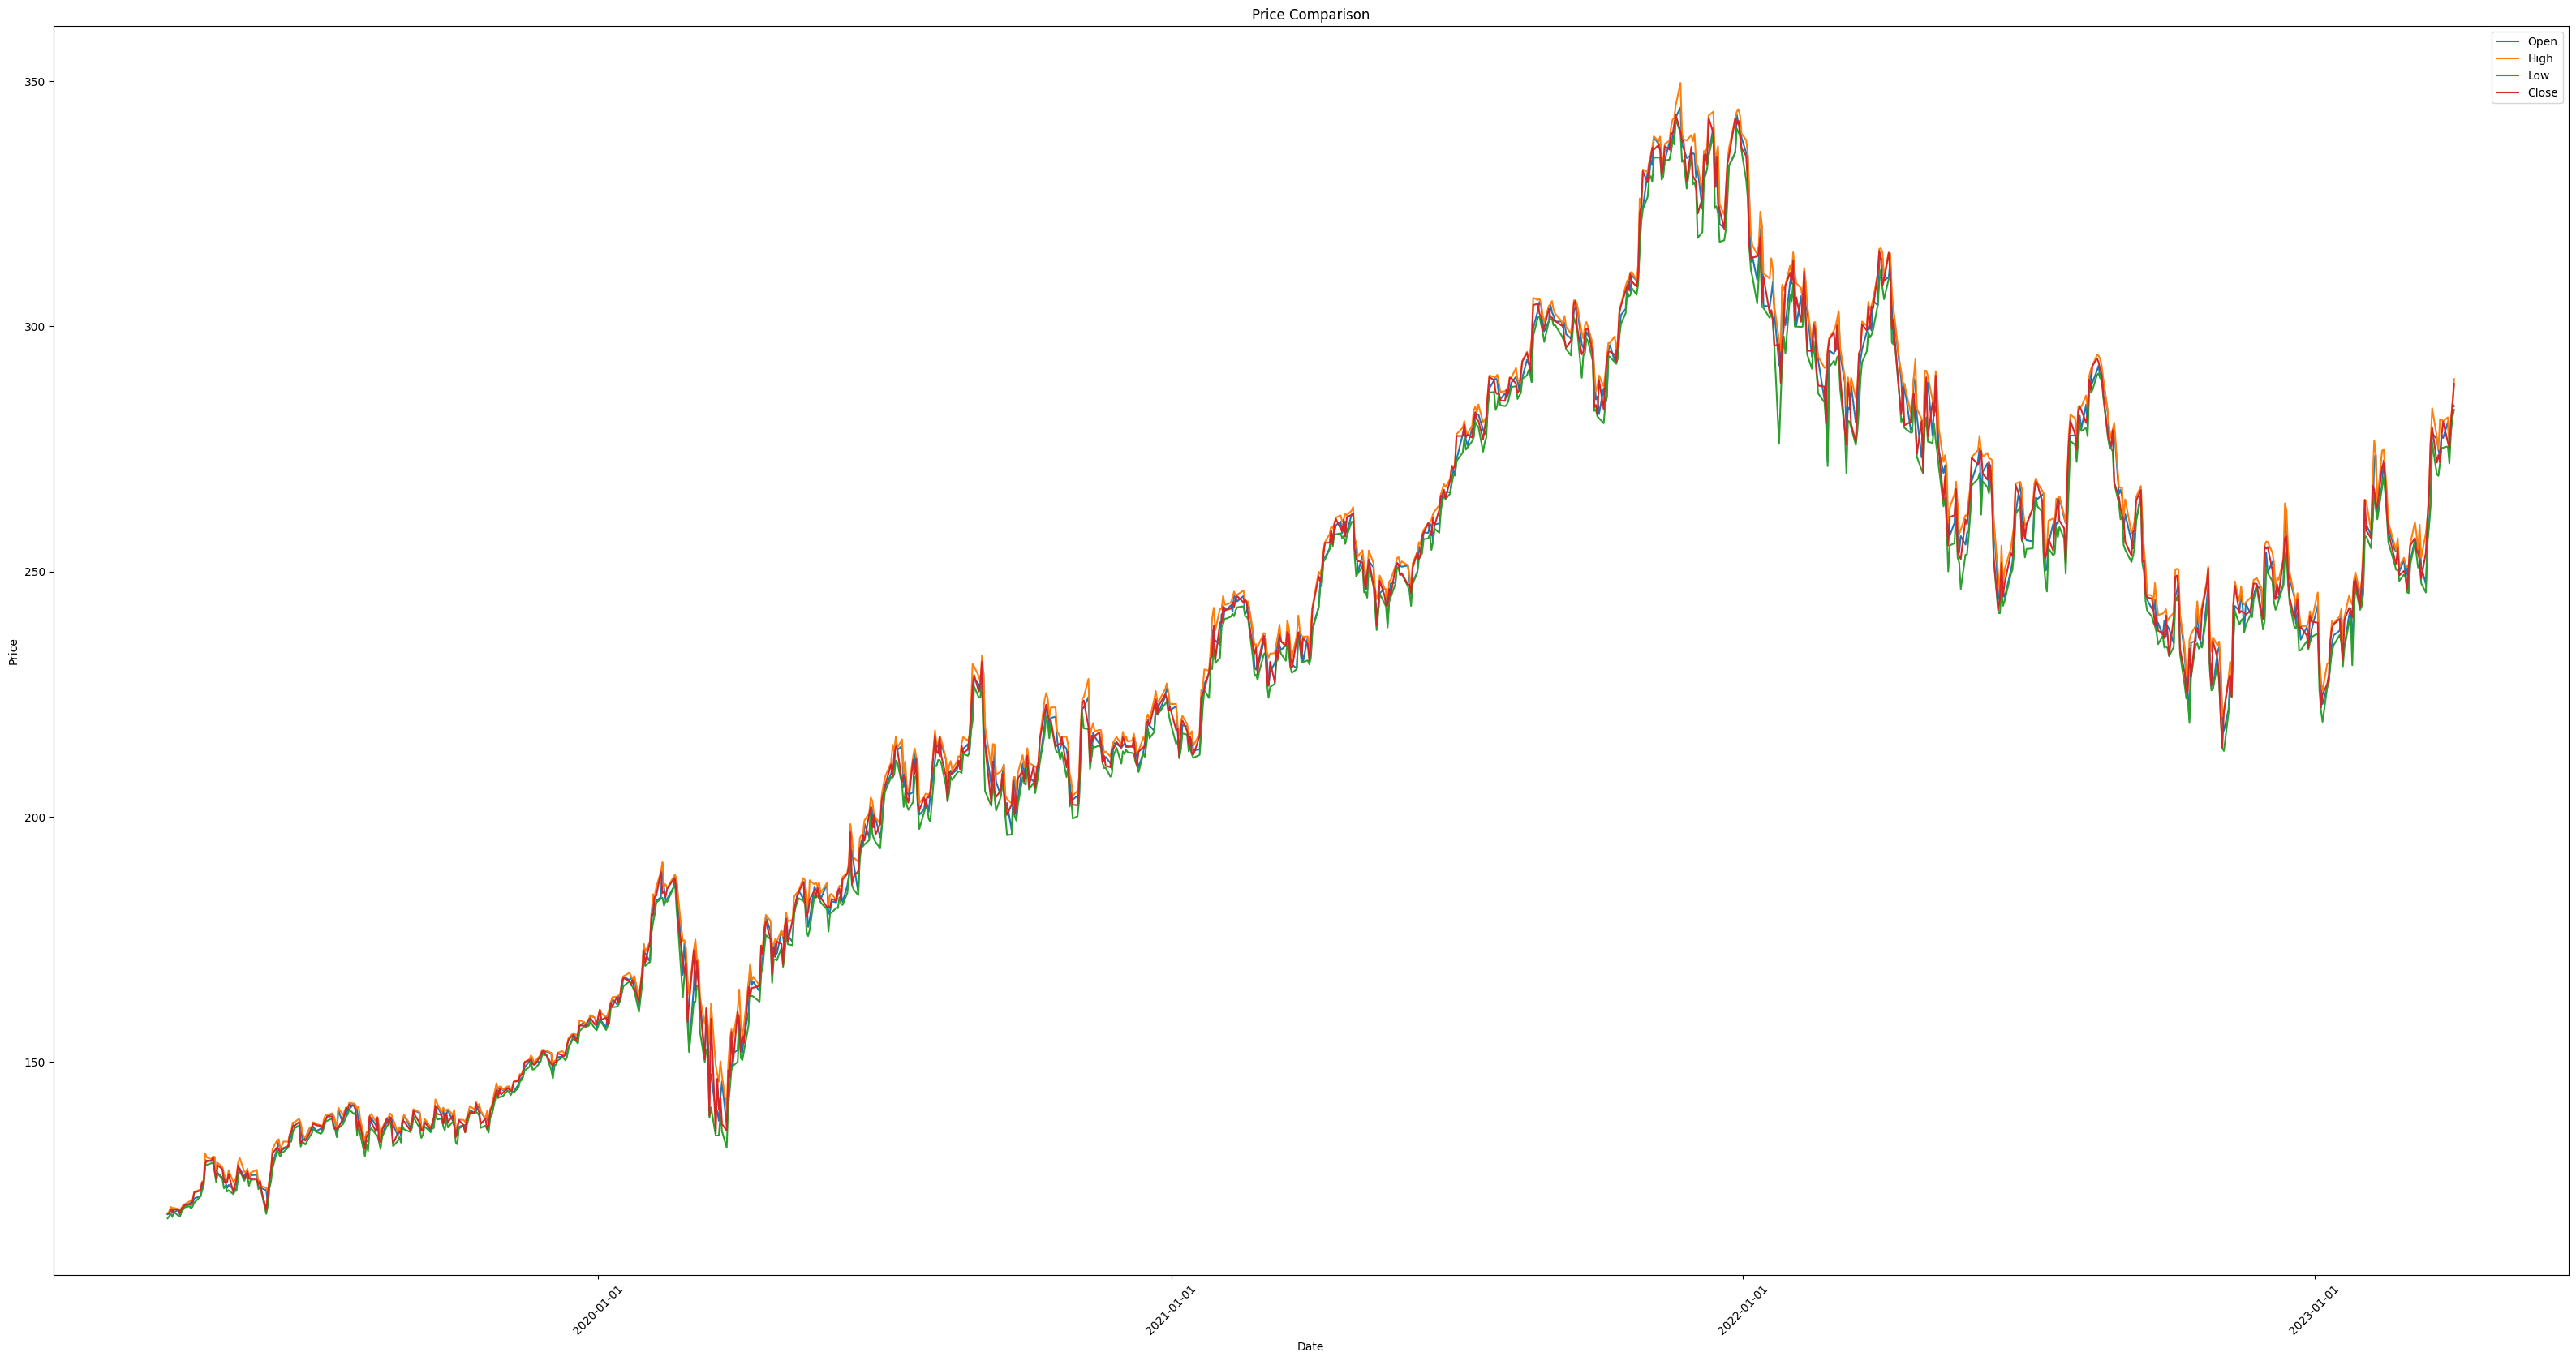

In [26]:
plt.figure(figsize=(40, 20))
date_formatter = mdates.DateFormatter('%Y-%m-%d')
year_locator = mdates.YearLocator()
plt.plot(dates, opens, label='Open')
plt.plot(dates, highs, label='High')
plt.plot(dates, lows, label='Low')
plt.plot(dates, closes, label='Close')
plt.title('Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gca().xaxis.set_major_locator(year_locator)
plt.xticks(rotation=45)
plt.savefig("Total.png",format="png")